# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Taiwan (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## 1. Import Dataset



In [ ]:
#import package
import pandas as pd
import numpy as np

In [ ]:
# Ini untuk upload data dari local ke google colab di section
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx
User uploaded file "Real estate valuation data set.xlsx" with length 32717 bytes


In [ ]:
#df = pd.read_csv("/content/drive/My Drive/Digital_Skola/real_estate.csv")#colab
df = pd.read_excel('/content/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#Check Row dan Column
df.shape

(414, 8)

In [ ]:
#Overview Stats Descriptive
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#Drop Column 'No', karena sudah ada Index
df.drop('No', inplace = True, axis = 1)

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Simplify Column Name

In [ ]:
#Simplify Column Name
df.rename(columns = {
    'X1 transaction date':'X1',
    'X2 house age':'X2',
    'X3 distance to the nearest MRT station':'X3',
    'X4 number of convenience stores':'X4',
    'X5 latitude':'X5',
    'X6 longitude':'X6',
    'Y house price of unit area':'Y',
}, inplace = True)

In [ ]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

**2.1 Gambarkan keadaan dari harga rumah pada variable (house price of unit area)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**a. Gambaran bisa dijelaskan dengan menggunakan statistik deskriptive dari variable harga rumah tersebut**

In [ ]:
df.Y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Dari data harga rumah tersebut, dapat disimpulkan bahwa harga rata-rata rumah sebesar 37.98, harga terendah sebesar 7.6 dan harga tertinggi sebesar 117.5.
Harga rata-rata rumah (37.98) dengan harga mediannya (38.45) tidak jauh berbeda, ini menandakan bahwa distribusi hargannya menyebar normal. 

**b. Sebaran harga rumah**

Dicek menggunakan statistical plot, apa keytakeaway / insight yang didapat? **Q1**

In [ ]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

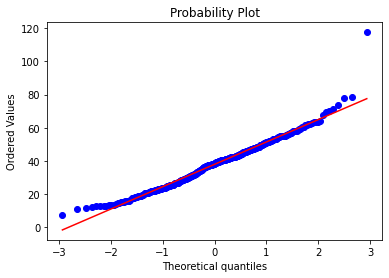

In [ ]:
stats.probplot(df['Y'], dist="norm", plot=py)
py.show()

#ini adalah QQ-Plot

**Answer Q1:** Berdasarkan dari visualisasi harga rumah diatas, dapat dilihat bahwa sebagian besar titik berada sejajar dengan garis, hal ini menandakan bahwa distribusi datanya adalah Normal Distribution.

**c. Apakah ada outlier pada variable harga rumah? Jika ada nilainya berapa saja? Q2**

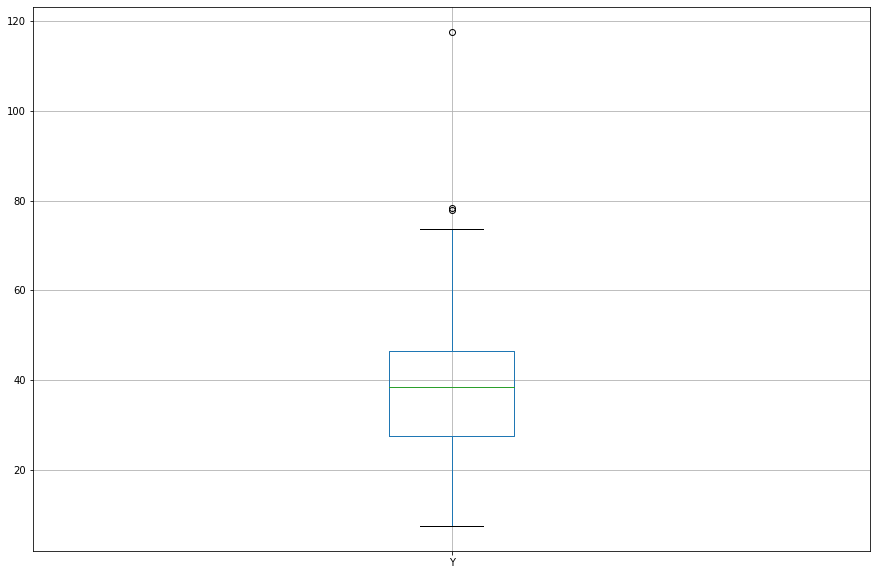

In [ ]:
df[['Y']].boxplot(figsize=(15, 10))

**Answer Q2:** Berdasarkan hasil dari visualisasi harga rumah (Y), dapat dilihat bahwa terdapat outlier dari variable harga rumah tersebut.

**d. Variable apa saja yang berkorelasi dengan harga rumah? Seberapa erat hubungannya?**

**NOTE: Jika nilai korelasinya >0.5 baik nilai plus (+) atau minus(-), maka ada hubungan erat antara variable, Jika nilai korelasinya <0.5, maka tidak ada hubungan erat antara variable**

In [ ]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Dari hasil analisis korelasi diatas, dapat diketahui bahwa jarak stasiun MRT/X3 (-0.67), banyaknya convenience store/X4 (0.57), dan letak lokasi longitude dan latitude/X5 & X6 (0.54 & 0.52) mempengaruhi harga rumah.

### Perbandingan korelasi antara variable

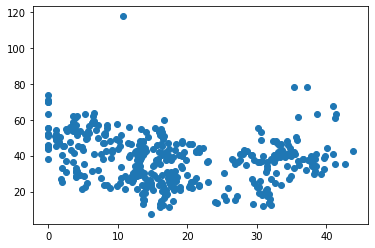

In [ ]:
# Perbandingan House Age vs House Price
plt.scatter(df['X2'], df['Y'])

**Apa yang dapat disimpulkan dari scatter plot ini? Q3**

**Answer Q3:** Berdasarkan hasil perbandingan korelasi antara variable House Age (X2) dengan House Price (Y). Dapat disimpulkan bahwa sebaran umur sebuah rumah dengan harga rumah terlihat merata, ini menandakan bahwa umur rumah tidak mempengaruhi harga rumah secara signifikan.

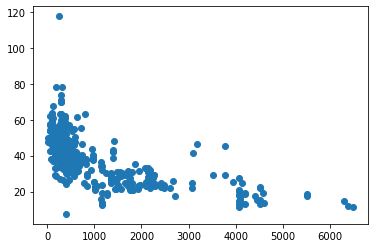

In [ ]:
# Distance to nearest MRT Station vs House Price
plt.scatter(df['X3'], df['Y'])

**Apa yang dapat disimpulkan dari scatter plot ini? Q4**

**Answer Q4:** Berdasarkan hasil perbandingan korelasi antara variable Distance Nearest MRT Station (X3) dengan House Price (Y). Dapat disimpulkan bahwa sebaran rumah dengan jarak ke statsiun yang lebih dekat terlihat lebih banyak serta memiliki harga yang lebih tinggi dibandingkan dengan rumah yang memiliki jarak terhadap stasiun yang lebih jauh. Ini menandakan bahwa jarak sebuah rumah terhadap stasiun MRT berpengaruh terhadap harga rumah secara signifikan.

**Lengkapi insight dan scatter plot untuk: Q5**


1.   Convenience Store (X4) vs House Price (Y)
2.   Latitude (X5) vs House Price (Y)
3.   Longitude (X6) vs House Price (Y)

**Answer Q5:**

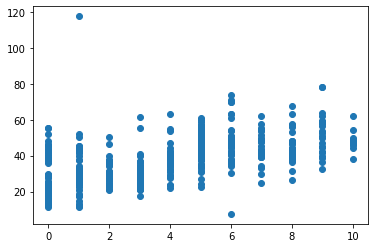

In [ ]:
# Convenience Store vs House Price
plt.scatter(df['X4'], df['Y'])

**5.1** Berdasarkan hasil perbandingan korelasi antara variable Convenience Store (X4) dengan House Price (Y). Dapat disimpulkan bahwa sebaran rumah dengan harga yang lebih tinggi adalah daerah yang memiliki jumlah convenience store lebih banyak.

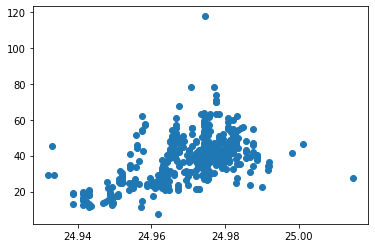

In [ ]:
# Latitude vs House Price
plt.scatter(df['X5'], df['Y'])

**5.2** Berdasarkan hasil perbandingan korelasi antara variable Latitude (X5) dengan House Price (Y). Dapat disimpulkan bahwa sebaran rumah paling banyak dengan harga lebih tinggi berada diantara koordinat latitude 24.94 dan 24.98.

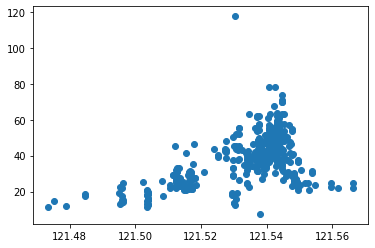

In [ ]:
# Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

**5.3** Berdasarkan hasil perbandingan korelasi antara variable Longitude (X6) dengan House Price (Y). Dapat disimpulkan bahwa sebaran rumah paling banyak dengan harga lebih tinggi berada koordinat longitude 121.54.

# 3. Pre-Processing

### Feature Engineering

**Cek Multikolinearitas**

Text(0.5, 1.0, 'Korelasi matrix antara variable X')

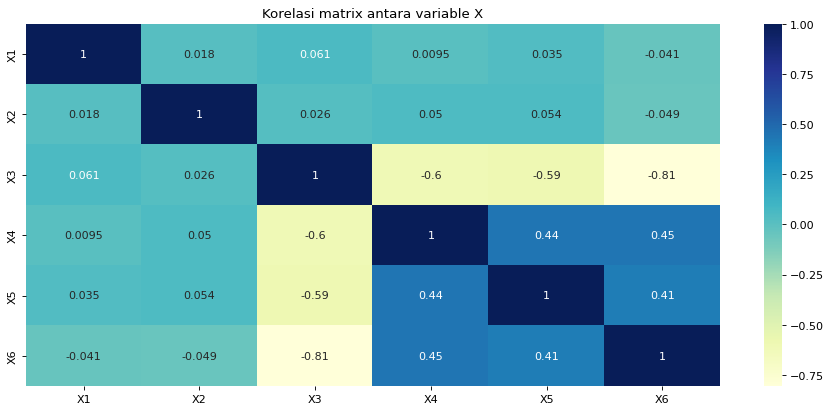

In [ ]:
fig,ax = plt.subplots(figsize=(14,6), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu", annot=True)
plt.title("Korelasi matrix antara variable X")

**Terdapat Multikolinearitas** antara variable X3 dan X6 sebesar (-0.81).
Variable Longitude (X6) tidak akan dimasukan kedalam model.

(Parameter keputusan: dilihat dari koefisien korelasi antara 2 variable X tersebut dengan variable Y, maka koefisien relasi yang lebih tinggi dengan variable Y, maka variable tersebut yang dipertahankan.

## Cek Null values dan Type

In [ ]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [ ]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

# 4. Create Model and Evaluation

In [ ]:
X = df.loc[:, 'X3':'X5']

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])

[[-0.34531897 -0.34185814  0.55644091]
 [-0.69629266  0.66545679  0.61405603]
 [-0.62078007  0.66545679  0.70447976]
 [-0.58456918  1.67277172 -0.00850737]
 [-0.56159308  1.33700008 -0.090929  ]
 [ 2.3638489  -1.34917307 -2.167474  ]
 [ 2.3638489  -1.34917307 -2.167474  ]
 [ 0.50106605 -0.67762978 -0.33339264]
 [-0.54920555  0.32968515  0.97735138]
 [-0.70551212 -1.34917307  0.19714661]]


In [ ]:
print(y_train[:10])

[[-0.46528169]
 [ 0.33764292]
 [ 2.41794759]
 [ 0.94348603]
 [ 0.32304429]
 [-1.83025352]
 [-1.62587271]
 [-0.53827484]
 [ 1.5274312 ]
 [ 1.27195519]]


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred = sc.inverse_transform(Lin_reg.predict((X_train)))
y_pred_tr = pd.DataFrame(ypred)
y_pred_tr

,0
0,40.131358
1,45.594018
2,45.390862
3,46.692333
4,45.249145
...,...
326,39.828374
327,39.480891
328,14.804726
329,45.390862


### MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lin_reg = mean_squared_error(sc.inverse_transform(y_train), ypred)
mse_lin_reg

90.19795036920229

### MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_lin_reg = mean_absolute_error(sc.inverse_transform(y_train), ypred)
mae_lin_reg

6.782203652293005

### R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_lin_reg = r2_score(sc.inverse_transform(y_train), ypred)
r2_lin_reg

0.5194253753361537

Model regresi ini hanya dapat menjelaskan 52% keragaman datanya. Model regresi yang baik adalah jika r2 > 75%

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5, )
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
ypred_R = sc.inverse_transform(Ridge.predict((X_train)))
ypred_tr_R = pd.DataFrame(ypred_R)
ypred_tr_R

,0
0,40.129239
1,45.588412
2,45.386208
3,46.686291
4,45.243192
...,...
326,39.827786
327,39.475643
328,14.823580
329,45.386208


### MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(sc.inverse_transform(y_train), ypred_R)
mse_ridge

90.19802784375057

### MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_ridge = mean_absolute_error(sc.inverse_transform(y_train), ypred_R)
mae_ridge

6.7814919290955595

### R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_ridge = r2_score(sc.inverse_transform(y_train), ypred_R)
r2_ridge

0.5194249625518077

## Random Forest Regressor

In [ ]:
# Q6 Buat Model dan Evaluation Score dari Random Forest dan SVR
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [ ]:
ypred_rfr = sc.inverse_transform(rf_regressor.predict((X_train)).reshape(-1, 1))
ypred_tr_rf = pd.DataFrame(ypred_rfr)
ypred_tr_rf

,0
0,38.580083
1,45.484417
2,67.880913
3,46.646000
4,42.036250
...,...
326,36.985795
327,90.502517
328,16.653337
329,67.880913


### MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_rfr = mean_squared_error(sc.inverse_transform(y_train), ypred_rfr)
mse_rfr

13.234924314977158

### MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_rfr = mean_absolute_error(sc.inverse_transform(y_train), ypred_rfr)
mae_rfr

2.5612116853990163

### R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_rfr = r2_score(sc.inverse_transform(y_train), ypred_rfr)
r2_rfr

0.9294843313058665

## SVR

In [ ]:
# Q6 Buat Model dan Evaluation Score dari Random Forest dan SVR
from sklearn.svm import SVR
Svr_reg = SVR()
Svr_reg.fit(X_train, y_train.ravel())

SVR()

In [ ]:
ypred_svr = sc.inverse_transform(Svr_reg.predict((X_train)).reshape(-1, 1))
ypred_tr_svr = pd.DataFrame(ypred_svr)
ypred_tr_svr

,0
0,39.383603
1,49.153723
2,47.303323
3,43.451983
4,42.382230
...,...
326,39.901074
327,43.284378
328,17.011905
329,47.303323


### MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_svr = mean_squared_error(sc.inverse_transform(y_train), ypred_svr)
mse_svr

66.96653723359867

### MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_svr = mean_absolute_error(sc.inverse_transform(y_train), ypred_svr)
mae_svr

5.241051623251076

### R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_svr = r2_score(sc.inverse_transform(y_train), ypred_svr)
r2_svr

0.6432023303817476

# 5. Model Comparison

In [ ]:
data = np.array([['', 'R-Square', 'MSE', 'MAE'],
                 ['Linear Regression', r2_lin_reg, mse_lin_reg, mae_lin_reg],
                 ['Ridge', r2_ridge, mse_ridge, mae_ridge],
                 ['Random Forest', r2_rfr, mse_rfr, mae_rfr],
                 ['SVR', r2_svr, mse_svr, mae_svr]
])

In [ ]:
data

array([['', 'R-Square', 'MSE', 'MAE'],
       ['Linear Regression', '0.5194253753361537', '90.19795036920229',
        '6.782203652293005'],
       ['Ridge', '0.5194249625518077', '90.19802784375057',
        '6.7814919290955595'],
       ['Random Forest', '0.9294843313058665', '13.234924314977158',
        '2.5612116853990163'],
       ['SVR', '0.6432023303817476', '66.96653723359867',
        '5.241051623251076']], dtype='<U32')

**Table Model Comparison**

In [ ]:
table = pd.DataFrame(data= data[1:, 1:],
                     index= data[1:, 0],
                     columns= data[0, 1:])

In [ ]:
table

,R-Square,MSE,MAE
Linear Regression,0.5194253753361537,90.19795036920229,6.782203652293005
Ridge,0.5194249625518077,90.19802784375057,6.7814919290955595
Random Forest,0.9294843313058665,13.234924314977158,2.5612116853990163
SVR,0.6432023303817476,66.96653723359867,5.241051623251076


**Q7: Betulkan Kesimpulan ini setelah keempat model dijalankan dan dievaluasi**

**Kesimpulan:** Dari 4 model yang telah dibuat diatas, model Random Forest merupakan model yang terbaik karena dari performance dapat dilihat bahwa model Random Forest memiliki R-Square lebih dari 75% yaitu sebesar 0.92 serta tingkat kesalahan MSE dan MAE masing-masing sebesar 13.23 dan 2.56. 
 
**Model Regresi yang bagus adalah yang R2 >=75% dan MSE <=10%**

_________________________________________________________________________________________

**END OF CODE**